# **Crash Course in Statistical Learning Worked Examples** 
# **Bayesian Learning** 
*For DSEM- Spring 2022*

By **Varadmurty Mohod**

In this notebook, We will be looking at worked examples exploring Bayesian Learning methods over different datasets and dive deep into their functionality.

# **Abstract**


*   Worked Example-1: Spam classification with Naive Bayes
*   Worked Example-2: Census Income Prediction
*   Conclusion
*   References





#  **Worked Example-1: Spam classification with Naive Bayes**

We'll start with a application for which Bayesian Learning is very popular i.e Spam Classification, as Naive Bayes works really well with text based problems.

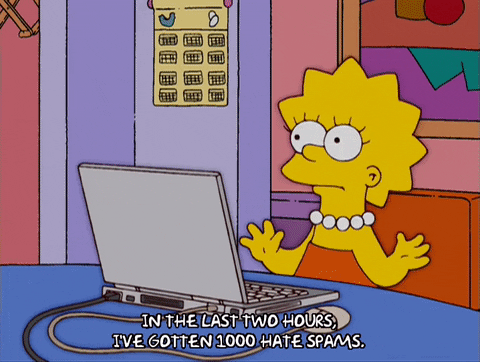

- Libraries
- Exploring the Dataset
- Distribution spam and non-spam plots
- Text Analytics
- Feature Engineering
- Predictive analysis (**Multinomial Naive Bayes**)
- Conclusion


## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

## Exploring the Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Varadmurty-mohod/Exploring-Bayesian-Learning/main/spam.csv', encoding='latin-1')
data.head(n=10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


## Distribution spam/non-spam plots

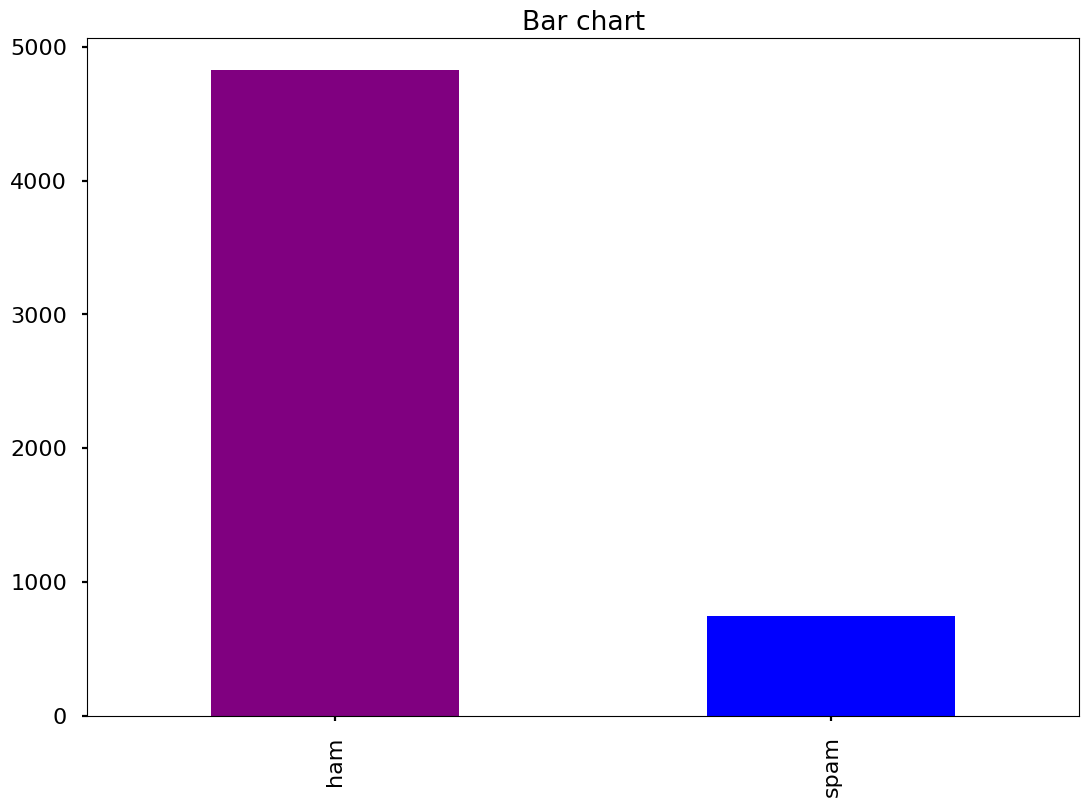

In [ ]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["Purple", "Blue"])
plt.title('Bar chart')
plt.show()

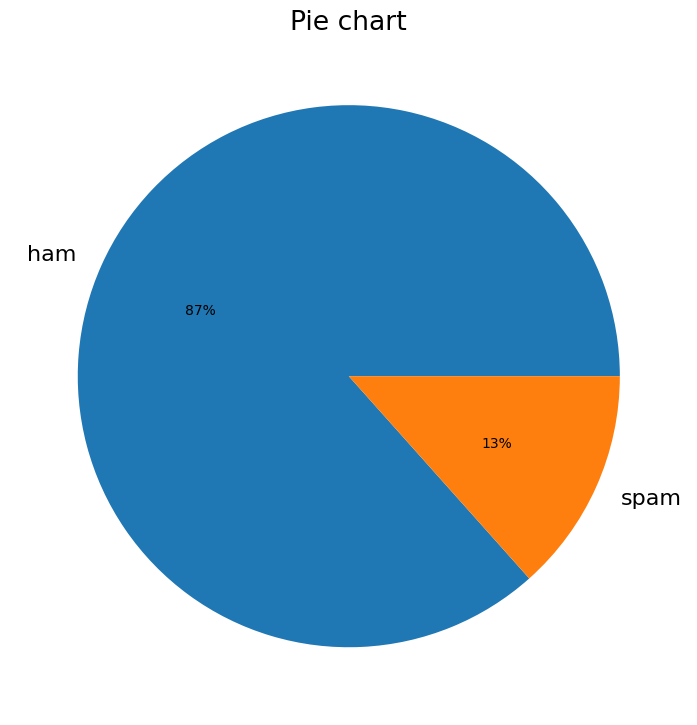

In [ ]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

## Text Analytics

We want to find the frequencies of words in the spam and non-spam messages. The words of the messages will be model features.<p>
We use the function Counter.

In [ ]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

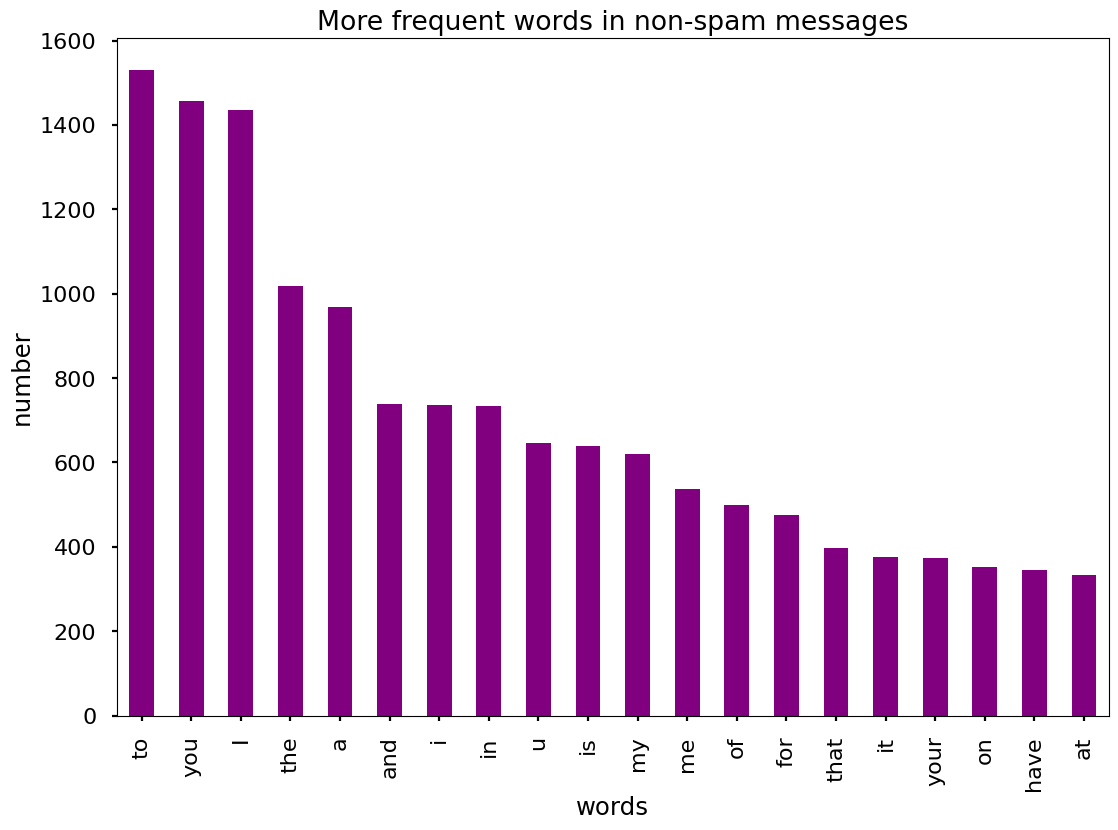

In [ ]:
df1.plot.bar(legend = False, color = 'Purple')
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

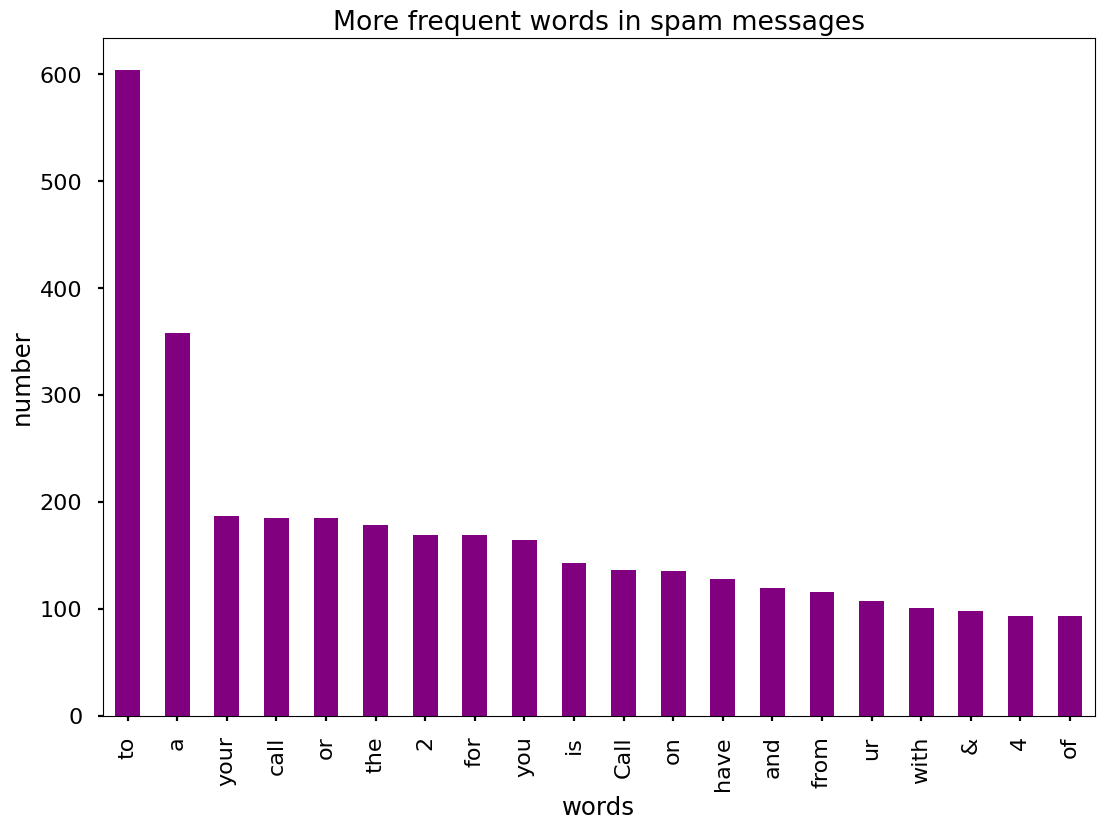

In [ ]:
df2.plot.bar(legend = False, color = 'Purple')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

We can see that the majority of frequent words in both classes are stop words such as 'to', 'a', 'or' and so on. <p>
With stop words we refer to the most common words in a lenguage, there is no simgle, universal list of stop words. <p>

## Feature engineering

Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that is able to build a dictionary of features and transform documents to feature vectors.<p>
**We remove the stop words in order to improve the analytics**

In [ ]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8404)

We have created more than 8400 new features. The new feature $j$ in the row $i$ is equal to 1 if the word $w_{j}$ appears in the text example $i$. It is zero if not.

## Predictive Analysis

My agenda is to predict if a new sms is spam or non-spam with a priority to avoid false positives


First we'll transform the variable spam/non-spam into binary variable, then we split our data set in training set and test set. 

In [ ]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


### Multinomial Naive Bayes Classifier

We train different bayes models changing the regularization parameter $\alpha$. <p>
We evaluate the accuracy, recall and precision of the model with the test set.

In [ ]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

Let's see the first 10 learning models and their metrics!

In [ ]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.998661,0.974443,0.920635,0.895753
1,0.11001,0.997857,0.976074,0.936508,0.893939
2,0.22001,0.997857,0.977162,0.936508,0.900763
3,0.33001,0.997589,0.977162,0.936508,0.900763
4,0.44001,0.997053,0.977162,0.936508,0.900763
5,0.55001,0.996250,0.976618,0.936508,0.897338
6,0.66001,0.996518,0.976074,0.932540,0.896947
7,0.77001,0.996518,0.976074,0.924603,0.903101
8,0.88001,0.996250,0.976074,0.924603,0.903101
9,0.99001,0.995982,0.976074,0.920635,0.906250


I select the model with the most test precision

In [ ]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             15.730010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

The best model does not produce any false positive, which was always our goal. <p>
Let's see if there are any more models with high precision.

In [ ]:
models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
143,15.73001,0.979641,0.969549,0.777778,1.0
144,15.84001,0.979641,0.969549,0.777778,1.0
145,15.95001,0.979641,0.969549,0.777778,1.0
146,16.06001,0.979373,0.969549,0.777778,1.0
147,16.17001,0.979373,0.969549,0.777778,1.0


Between these models with the highest possible precision, we are going to select which has more test accuracy.

In [ ]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             15.730010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

#### Confusion matrix with Naive Bayes Classifier

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,56,196


* #### We misclassify 56 spam messages as non-spam emails whereas we don't misclassify any non-spam message.

**In conclusion**, the Naive Bayes classifier is a simple yet effective algorithm for classifying spam and non-spam emails. By considering the probabilities of each word's occurrence in both spam and non-spam emails, the classifier can determine the likelihood of an email being spam or non-spam. With proper training and tuning of hyperparameters, the Naive Bayes classifier can achieve high accuracy in distinguishing between spam and non-spam emails. This makes it a popular choice for email filtering systems and other text classification tasks. However, it is important to note that the Naive Bayes classifier assumes that the features (words) are independent of each other, which may not always be the case in practice. Nonetheless, the Naive Bayes classifier remains a useful and widely used algorithm for spam filtering and text classification tasks.

# **Worked Example-2: Census Income Prediction**

We have a dataset with details of adults and we'll predict if their income exceeds $50k/year based on census data, simple as that. Let's get started!

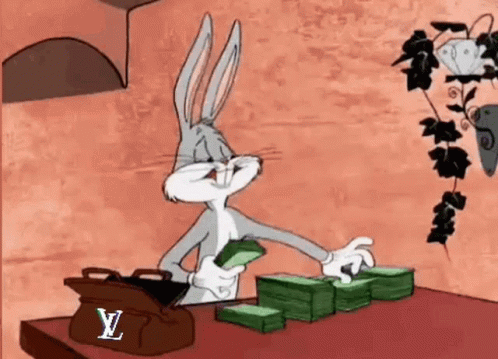

Importing Libararies

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

Reading data

In [ ]:
data = 'https://raw.githubusercontent.com/Varadmurty-mohod/Exploring-Bayesian-Learning/main/adult.csv'

df = pd.read_csv(data, header=None, sep=',\s')

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(32561, 15)

The columns are not labelled properly and just start with numbers, so we'll label them next.

In [ ]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = columns

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## **Some good ol' EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


No missing values in there, but we need to classifythe numeric and categorical data

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print(format(len(categorical)))

print(categorical)

9
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


So we have 9 categorical variables

In [ ]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


<Axes: xlabel='age', ylabel='Density'>

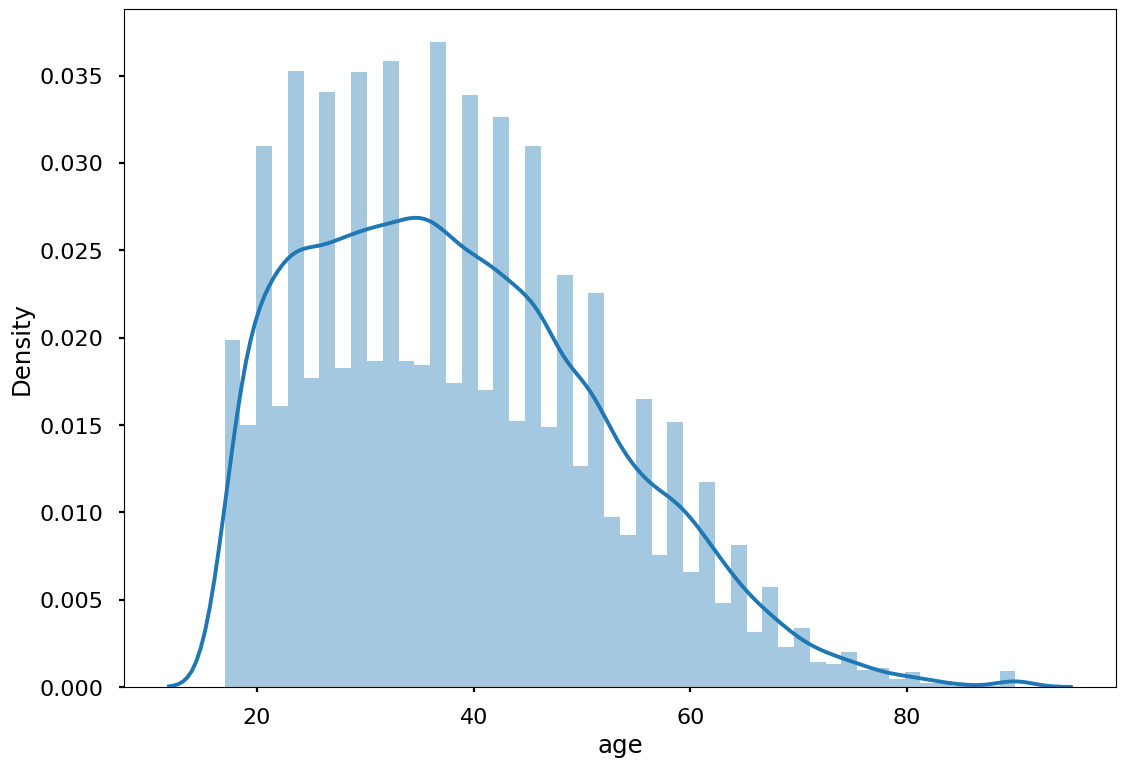

In [ ]:
sns.distplot(df.age)

viewing frequency counts of values in categorical variables

In [ ]:
for var in categorical: 
    
    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

Checking labels in workclass variable

In [ ]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Checking frequency distribution of values in workclass variable

In [ ]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

We can see that there are 1836 values encoded as ? in the workclass variable. We'll  replace these with NaN.

In [ ]:
df['workclass'].replace('?', np.NaN, inplace=True)

In [ ]:
df['occupation'].replace('?', np.NaN, inplace=True)

In [ ]:
df['native_country'].replace('?', np.NaN, inplace=True)

Exploring numerical values

In [ ]:

numerical = [var for var in df.columns if df[var].dtype!='O']

print(format(len(numerical)))

print(numerical)

6
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [ ]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

## **Defining the model**

In [ ]:
X = df.drop(['income'], axis=1)

y = df['income']

Test train split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [ ]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

## **Feature Engineering**

In [ ]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [ ]:
# Printing categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [ ]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

In [ ]:
# Checking missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [ ]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [ ]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [ ]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [ ]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

One hot encoding

In [ ]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape

(22792, 105)

In [ ]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Training the model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

## **Results**

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8083


Accuracy of 80%

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465


<Axes: >

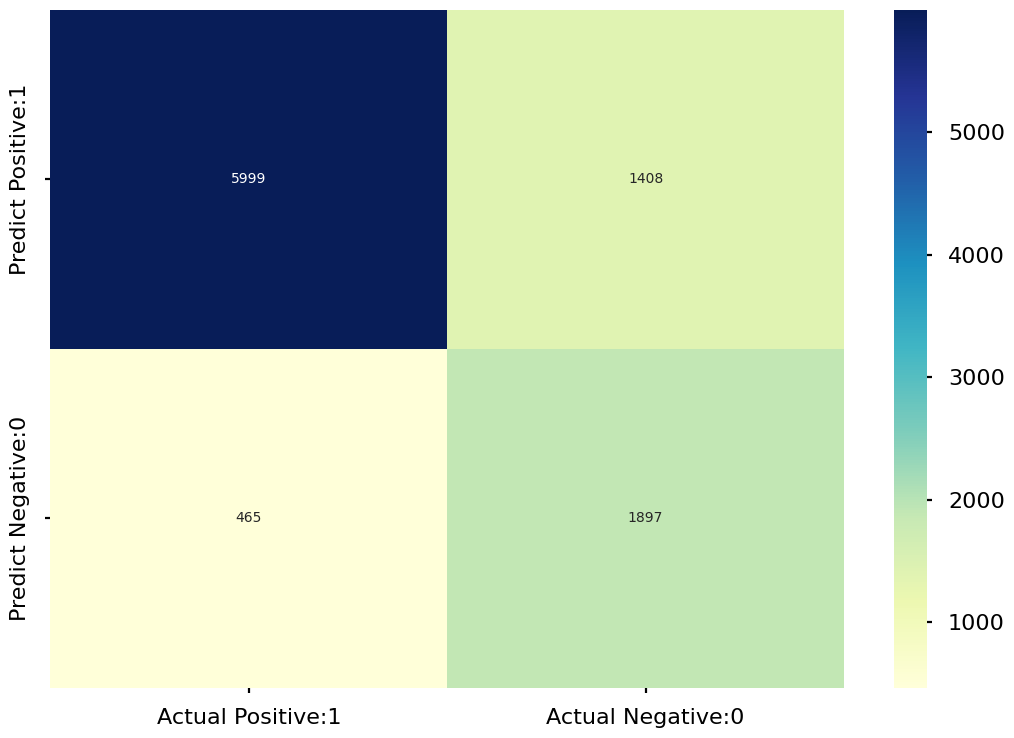

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**In conclusion**, the Naive Bayes classifier is a valuable tool for predicting whether an adult's income exceeds $50k/year based on census data. By considering the probabilities of different features such as age, education, occupation, and marital status, the Naive Bayes classifier can make accurate predictions about an individual's income level.

Through proper data preprocessing, feature selection, and model training, the Naive Bayes classifier can achieve high accuracy in predicting income levels. It is a simple and efficient algorithm that can be implemented with ease and is particularly useful for text classification tasks like predicting income levels from census data.

However, it is important to note that the Naive Bayes classifier makes the assumption of feature independence, which may not always hold true in real-world scenarios. Additionally, the accuracy of the predictions may be affected by the quality and representativeness of the dataset used for training. Therefore, it is crucial to carefully analyze and preprocess the data, and fine-tune the model hyperparameters to achieve the best results.

Overall, the Naive Bayes classifier can be a powerful tool for predicting income levels from census data, but it should be used in conjunction with other machine learning techniques and best practices to ensure accurate and reliable predictions.

# **Conclusion**

In conclusion, Bayesian machine learning is a powerful framework that provides a probabilistic approach to modeling and inference. It allows us to incorporate prior knowledge and beliefs about the problem into the model, resulting in more accurate and robust predictions. In this assignment, we explored several Bayesian machine learning models and concepts, such as Bayes' theorem, Bayesian linear regression, and various types of Naive Bayes classifiers.

We also worked through examples using real-world datasets to demonstrate the practical application of Bayesian machine learning. These examples showed how Bayesian methods can be used to solve classification and regression problems, and how the choice of prior can impact the model's predictions.

Overall, Bayesian machine learning provides a flexible and powerful framework for modeling complex data and making accurate predictions. It is an essential tool for data scientists and machine learning practitioners who want to build robust and accurate models.

# **References**




---



https://www.wso2.com/blog/research/part-one-introduction-to-bayesian-learning/#:~:text=Bayesian%20learning%20uses%20Bayes'%20theorem,given%20some%20evidence%20or%20observations.


https://www.towardsdatascience.com/what-is-bayesian-inference-4eda9f9e20a6

https://www.quantstart.com/articles/Bayesian-Linear-Regression-Models-with-PyMC3

http://twiecki.github.io/blog/2013/08/12/bayesian-glms-1/

https://wiseodd.github.io/techblog/2017/01/05/bayesian-regression/

PyMC3 Introduction

https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7

Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/

https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html




---



MIT License

Copyright (c) 2023 Varadmurty Mohod

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.